# Decision Tree Regression

## Fish Market Raw Data

The fish market dataset is a collection of data related to various species of fish and their characteristics. This dataset is designed for polynomial regression analysis and contains several columns with specific information.
From: https://www.kaggle.com/datasets/vipullrathod/fish-market/data

In [1]:
# Begin by importing necessary libraries to start this exercise

import numpy as np  # always useful for Scikit-learn
import pandas as pd # always usefull for data preparation
import os.path      # work with files within this environment

# Check if the file was already downloaded, if so, remove it

from pathlib import Path
my_file = Path("Fish.csv")
if my_file.is_file():
   os.unlink("Fish.csv")

# download the file from github, use -q for quiet
# use --show-progress to show download progress only

!wget -q --show-progress https://raw.githubusercontent.com/coyoacan/Practice-in-Colab/refs/heads/main/source-files/Fish.csv
dataset = pd.read_csv('Fish.csv')

# See which kind of features we are dealing with

dataset.info()

# make a copy of this dataframe for EDA purposes

df = dataset.copy()


Fish.csv            100%[===================>]   5.88K  --.-KB/s    in 0s      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## First step: Polynomial Regression as a reference

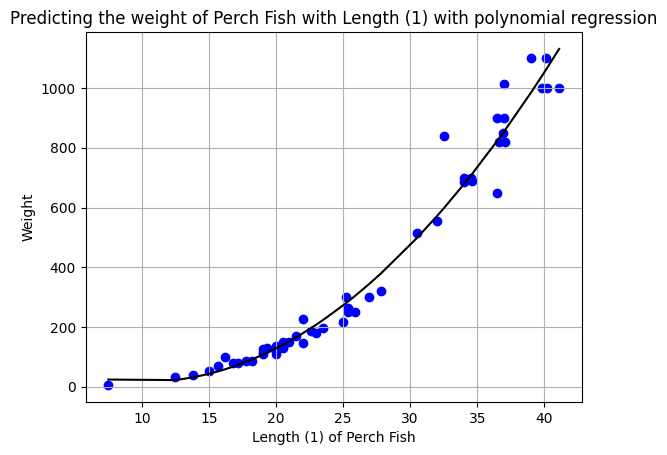

R2 Score in polynomial regression: 0.972


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# select values for Perch Species
Perch = df[df["Species"]=="Perch"]
X_ = Perch["Length1"].to_numpy()
y = Perch["Weight"].to_numpy()

# I know this is infuriating but we always have to reshape X

X = X_.reshape(-1, 1)

# 2nd degree polynomial equation

poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform X_

poly_features = poly.fit_transform(X)

# Polynomial Regression Model

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)


# Predict
y_predicted = poly_reg_model.predict(poly_features)

# Visualize

plt.grid(True)

plt.title("Predicting the weight of Perch Fish with Length (1) with polynomial regression")
plt.xlabel("Length (1) of Perch Fish")
plt.ylabel("Weight")

plt.scatter(X_, y,color='b')
plt.plot(X_, y_predicted, c="k")
plt.show()

linear_regressor_score = poly_reg_model.score(poly_features, y)

print("R2 Score in polynomial regression: %.3f" % (linear_regressor_score))

## Decision Tree Regression

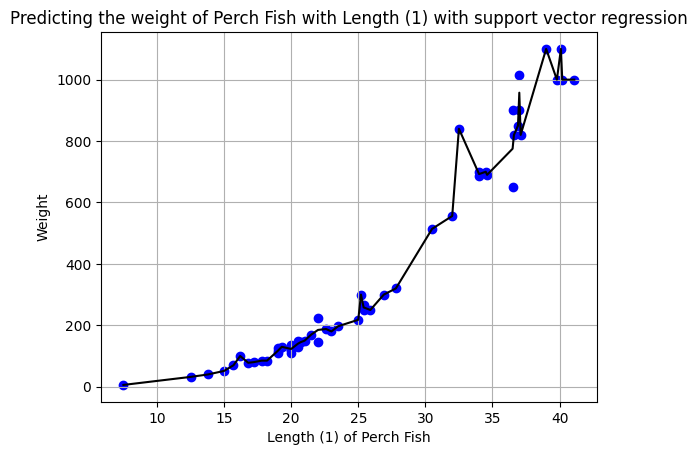

R2 Score in support vector machine regression: 0.994


In [3]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# select values for Perch Species
Perch = df[df["Species"]=="Perch"]
X_ = Perch["Length1"].to_numpy()
y = Perch["Weight"].to_numpy()

sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X_.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

dt = DecisionTreeRegressor(random_state=1917)
dt.fit(X, y)

y_predicted = dt.predict(X)

# Visualize

plt.grid(True)

plt.title("Predicting the weight of Perch Fish with Length (1) with support vector regression")
plt.xlabel("Length (1) of Perch Fish")
plt.ylabel("Weight")

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y),color='b')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(y_predicted.reshape(-1,1)), c="k")
plt.show()

decision_tree_score = dt.score(X, y)

print("R2 Score in support vector machine regression: %.3f" % (decision_tree_score))

## Make your conclusions

In [4]:
print("R2 Score in support vector machine regression: %.3f" % (decision_tree_score))
print("R2 Score in polynomial regression: %.3f" % (linear_regressor_score))

R2 Score in support vector machine regression: 0.994
R2 Score in polynomial regression: 0.972
